In [2]:
import pandas as pd
import os
from datetime import datetime

# --- Config ---
TARGET_PRODUCTS = {
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later (BNPL)",
    "Savings account",
    "Money transfers"
}

CHUNK_SIZE = 10000
INPUT_PATH = r"C:\Users\HP\Desktop\Tenx\week6\Intelligent-Complaint-Analysis-for-Financial-Services\data\raw\complaints.csv"
OUTPUT_PATH = "data/processed/filtered_complaints.csv"

# --- Clean Text ---
def clean_text(text):
    if pd.isnull(text):
        return None
    text = text.lower()
    text = pd.Series(text).replace(r'[^a-zA-Z0-9\s]', '', regex=True).values[0]
    text = text.replace('i am writing to file a complaint', '')
    return text.strip()

# --- Process CSV in Chunks ---
def process_and_filter_chunks():
    print(f"[{datetime.now()}] 🚀 Starting filtering and cleaning...")
    filtered_rows = []

    chunk_iter = pd.read_csv(INPUT_PATH, chunksize=CHUNK_SIZE, usecols=[
        'Product', 'Issue', 'Consumer complaint narrative', 'Company', 'Date received'
    ])

    for i, chunk in enumerate(chunk_iter):
        chunk = chunk[chunk['Product'].isin(TARGET_PRODUCTS)]
        chunk = chunk.dropna(subset=['Consumer complaint narrative'])
        chunk['cleaned_narrative'] = chunk['Consumer complaint narrative'].apply(clean_text)

        filtered_rows.append(chunk[['Product', 'Issue', 'cleaned_narrative', 'Company', 'Date received']])
        print(f"[Chunk {i+1}] ✅ Processed {len(chunk)} rows")

    df_final = pd.concat(filtered_rows, ignore_index=True)
    os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
    df_final.to_csv(OUTPUT_PATH, index=False)
    print(f"[{datetime.now()}] ✔️ File saved: {OUTPUT_PATH} | Rows: {len(df_final)}")

# --- Main ---
if __name__ == "__main__":
    process_and_filter_chunks()


[2025-07-08 16:48:42.904516] 🚀 Starting filtering and cleaning...
[Chunk 1] ✅ Processed 0 rows
[Chunk 2] ✅ Processed 10 rows
[Chunk 3] ✅ Processed 8 rows
[Chunk 4] ✅ Processed 8 rows
[Chunk 5] ✅ Processed 24 rows
[Chunk 6] ✅ Processed 14 rows
[Chunk 7] ✅ Processed 53 rows
[Chunk 8] ✅ Processed 36 rows
[Chunk 9] ✅ Processed 10 rows
[Chunk 10] ✅ Processed 28 rows
[Chunk 11] ✅ Processed 10 rows
[Chunk 12] ✅ Processed 17 rows
[Chunk 13] ✅ Processed 19 rows
[Chunk 14] ✅ Processed 40 rows
[Chunk 15] ✅ Processed 21 rows
[Chunk 16] ✅ Processed 35 rows
[Chunk 17] ✅ Processed 18 rows
[Chunk 18] ✅ Processed 6 rows
[Chunk 19] ✅ Processed 4 rows
[Chunk 20] ✅ Processed 15 rows
[Chunk 21] ✅ Processed 13 rows
[Chunk 22] ✅ Processed 23 rows
[Chunk 23] ✅ Processed 16 rows
[Chunk 24] ✅ Processed 18 rows
[Chunk 25] ✅ Processed 13 rows
[Chunk 26] ✅ Processed 50 rows
[Chunk 27] ✅ Processed 28 rows
[Chunk 28] ✅ Processed 19 rows
[Chunk 29] ✅ Processed 28 rows
[Chunk 30] ✅ Processed 31 rows
[Chunk 31] ✅ Proce

In [3]:
import pandas as pd

# Only read first few rows and show columns
df_preview = pd.read_csv(
    r"C:\Users\HP\Desktop\Tenx\week6\Intelligent-Complaint-Analysis-for-Financial-Services\data\raw\complaints.csv",
    nrows=5
)
print(df_preview.columns.tolist())


['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load filtered complaints
df = pd.read_csv("data/processed/filtered_complaints.csv")

# Quick peek
print(df.head())
print(df.info())


       Product                                            Issue  \
0  Credit card                            Getting a credit card   
1  Credit card               Other features, terms, or problems   
2  Credit card             Incorrect information on your report   
3  Credit card  Problem with a purchase shown on your statement   
4  Credit card                     Problem when making payments   

                                   cleaned_narrative  \
0  a xxxx xxxx card was opened under my name by a...   
1  dear cfpb i have a secured credit card with ci...   
2  i have a citi rewards cards the credit balance...   
3  bi am writing to dispute the following charges...   
4  although the account had been deemed closed i ...   

                           Company Date received  
0                   CITIBANK, N.A.    2025-06-13  
1                   CITIBANK, N.A.    2025-06-12  
2                   CITIBANK, N.A.    2025-06-12  
3                   CITIBANK, N.A.    2025-06-09  
4  At

In [5]:
# Calculate word counts of complaint narratives
df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(str(x).split()))

print(df['word_count'].describe())


count    82164.000000
mean       196.202729
std        215.595103
min          2.000000
25%         63.000000
50%        139.000000
75%        255.000000
max       6469.000000
Name: word_count, dtype: float64


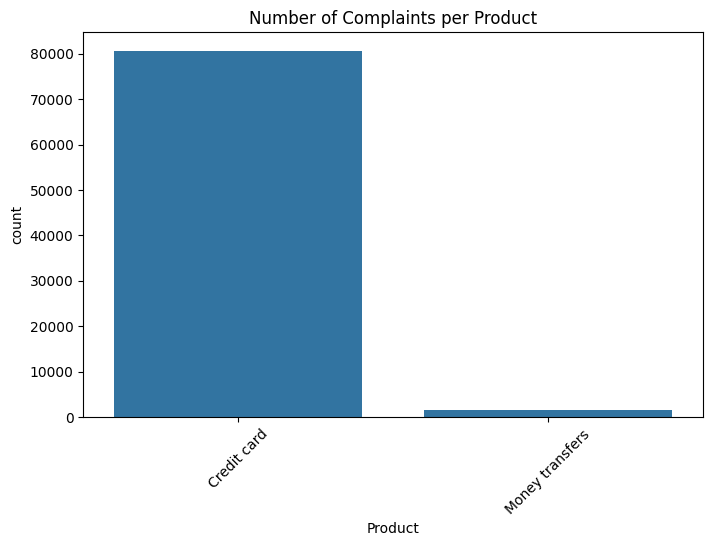

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.title("Number of Complaints per Product")
plt.xticks(rotation=45)
plt.show()


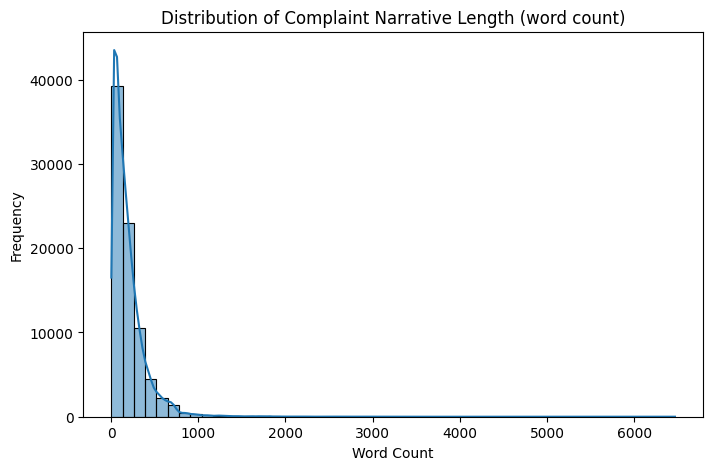

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Length (word count)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [8]:
print("Complaints with narrative:", df['cleaned_narrative'].notnull().sum())
print("Complaints without narrative:", df['cleaned_narrative'].isnull().sum())


Complaints with narrative: 82164
Complaints without narrative: 0


In [9]:
!pip install langchain sentence-transformers faiss-cpu


  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [10]:
import pandas as pd
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import os
import pickle

# Load filtered complaints
df = pd.read_csv("data/processed/filtered_complaints.csv")


c:\Users\HP\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
chunk_size = 500      # number of characters per chunk (tune as needed)
chunk_overlap = 100   # overlap between chunks to maintain context

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)


In [12]:
# Load embedding model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
embedder = SentenceTransformer(model_name)


In [13]:
documents = []
metadata = []

for idx, row in df.iterrows():
    text = row['cleaned_narrative']
    chunks = text_splitter.split_text(text)
    
    for chunk in chunks:
        documents.append(chunk)
        metadata.append({
            'product': row['Product'],
            'issue': row['Issue'],
            'company': row['Company'],
            'date_received': row['Date received'],
            'original_idx': idx
        })

print(f"Created {len(documents)} text chunks from {len(df)} complaints.")


Created 265507 text chunks from 82164 complaints.


In [ ]:
embeddings = embedder.encode(documents, show_progress_bar=True, convert_to_numpy=True)
print(f"Computed embeddings shape: {embeddings.shape}")
git

Batches:   1%|          | 87/8298 [01:15<1:39:04,  1.38it/s]

In [ ]:
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 distance

index.add(embeddings)
print(f"FAISS index contains {index.ntotal} vectors.")

# Save FAISS index & metadata
os.makedirs("vector_store", exist_ok=True)
faiss.write_index(index, "vector_store/faiss_index.index")

with open("vector_store/metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)

print("Saved FAISS index and metadata.")
